# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [146]:
# Dependencies and Setup
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import requests
# import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from citipy import citipy
import requests
import seaborn as sns
from datetime import datetime
# Import API key
#import api_keys
api_key = "36bd66b70da6471bb5a542f1b805044b"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [147]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
#Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities
# df = pd.DataFrame({'Cities':cities,'Lat_longs':lats})
# df.head()

['luwuk',
 'nikolskoye',
 'atuona',
 'hobart',
 'alofi',
 'bethel',
 'khatanga',
 'bredasdorp',
 'ngunguru',
 'barrow',
 'nemuro',
 'pinkafeld',
 'rikitea',
 'mataura',
 'krasnodon',
 'busselton',
 'taolanaro',
 'arraial do cabo',
 'sensuntepeque',
 'norman wells',
 'castro',
 'adrar',
 'kapaa',
 'vaitupu',
 'bathurst',
 'gwadar',
 'shache',
 'amderma',
 'amahai',
 'hofn',
 'erzincan',
 'chagda',
 'natal',
 'northam',
 'port alfred',
 'albany',
 'flinders',
 'omsukchan',
 'cabo san lucas',
 'chissamba',
 'new norfolk',
 'saldanha',
 'puerto ayora',
 'faanui',
 'pevek',
 'ocampo',
 'padang',
 'punta arenas',
 'thompson',
 'sarangani',
 'galiwinku',
 'cape town',
 'kiruna',
 'ushuaia',
 'ampanihy',
 'mitsamiouli',
 'taoudenni',
 'grand river south east',
 'bluff',
 'mergui',
 'santiago',
 'saint george',
 'tura',
 'kishapu',
 'yellowknife',
 'kangaatsiaq',
 'makaha',
 'andros town',
 'esperance',
 'camana',
 'nome',
 'kaiyuan',
 'churachandpur',
 'waddan',
 'port blair',
 'dingle',
 'ben

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [148]:
# def get_weather_from_city(row):
#     url = "http://api.openweathermap.org/data/2.5/weather?"
#     query_url = url + "appid=" + api_key + "&units=imperial" + "&q="
#response = requests.get(f"{query_url}{city}").json()
#     return response
# response
# for x in range(city):
#     response = requests.get(f"{query_url}{city}").json()

#weather_response = requests.get(query_url)
# weather_json = response.json()

# #Get the temperature from the response
#print(f"The weather API responded with: {weather_json}.")
#query = f"{url}appid={api_key}&q="
#weather_response

# for x in range(len(cities)):
# response = requests.get(f"{query_url}{cities},").json()
#  Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + api_key + "&units=imperial" + "&q="
citi_name = []
cloudiness = []
country = []
date = []
temp = []
humidity = []
lat = []
long = []
wind_speed = []

record = 1

for city in cities:
    try: 
        response = requests.get(f"{query_url}{city}").json() 
        citi_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        temp.append(response["main"]["temp"])   
        humidity.append(response["main"]["humidity"]) 
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        print(f"Processing Record {record} | {city}")
        #print(f"{query_url}&q={city}")
        record= record + 1

    except:
        print("City not found. Skipping...")
    continue

Processing Record 1 | luwuk
Processing Record 2 | nikolskoye
Processing Record 3 | atuona
Processing Record 4 | hobart
Processing Record 5 | alofi
Processing Record 6 | bethel
Processing Record 7 | khatanga
Processing Record 8 | bredasdorp
Processing Record 9 | ngunguru
Processing Record 10 | barrow
Processing Record 11 | nemuro
Processing Record 12 | pinkafeld
Processing Record 13 | rikitea
Processing Record 14 | mataura
Processing Record 15 | krasnodon
Processing Record 16 | busselton
City not found. Skipping...
Processing Record 17 | arraial do cabo
Processing Record 18 | sensuntepeque
Processing Record 19 | norman wells
Processing Record 20 | castro
Processing Record 21 | adrar
Processing Record 22 | kapaa
City not found. Skipping...
Processing Record 23 | bathurst
Processing Record 24 | gwadar
Processing Record 25 | shache
City not found. Skipping...
Processing Record 26 | amahai
Processing Record 27 | hofn
Processing Record 28 | erzincan
City not found. Skipping...
Processing Rec

Processing Record 230 | matadi
Processing Record 231 | ankang
Processing Record 232 | taganak
Processing Record 233 | geraldton
Processing Record 234 | kavaratti
Processing Record 235 | port shepstone
Processing Record 236 | la reforma
Processing Record 237 | charters towers
Processing Record 238 | severo-kurilsk
Processing Record 239 | batemans bay
City not found. Skipping...
Processing Record 240 | sholokhovskiy
Processing Record 241 | xining
City not found. Skipping...
Processing Record 242 | berkakit
Processing Record 243 | puerto morazan
Processing Record 244 | phan thiet
Processing Record 245 | sheltozero
City not found. Skipping...
Processing Record 246 | sabang
Processing Record 247 | khani
Processing Record 248 | freeport
Processing Record 249 | banda aceh
Processing Record 250 | avarua
City not found. Skipping...
Processing Record 251 | kindu
Processing Record 252 | lermontovka
Processing Record 253 | vestmannaeyjar
Processing Record 254 | necochea
Processing Record 255 | uda

Processing Record 444 | chimore
Processing Record 445 | nosivka
City not found. Skipping...
Processing Record 446 | cockburn town
Processing Record 447 | ulaanbaatar
Processing Record 448 | riverton
Processing Record 449 | providencia
Processing Record 450 | gat
Processing Record 451 | sungaipenuh
Processing Record 452 | ginir
Processing Record 453 | atar
Processing Record 454 | hede
Processing Record 455 | klyuchi
Processing Record 456 | pangnirtung
Processing Record 457 | shibata
Processing Record 458 | mamlyutka
Processing Record 459 | sonoita
Processing Record 460 | hearst
Processing Record 461 | poopo
Processing Record 462 | menomonie
Processing Record 463 | dongsheng
Processing Record 464 | kaili
Processing Record 465 | houma
Processing Record 466 | papara
Processing Record 467 | novikovo
Processing Record 468 | esfahan
Processing Record 469 | elko
Processing Record 470 | tuatapere
Processing Record 471 | sompeta
Processing Record 472 | kavieng
Processing Record 473 | zhangjiakou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [149]:
weather_df = pd.DataFrame({"City": citi_name,"Cloudiness": cloudiness,"Country": country,"Date": date, "Humidity": humidity,"Latitude": lat,"Longitude": long,"Temp": temp,"Wind Speed": wind_speed})
weather_df.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Latitude      532
Longitude     532
Temp          532
Wind Speed    532
dtype: int64

In [150]:
weather_df.to_csv('../HW/weather.csv')
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temp,Wind Speed
0,Luwuk,68,ID,1547949612,91,-0.95,122.79,82.49,3.60
1,Nikolskoye,40,RU,1547947800,92,59.70,30.79,24.80,6.71
2,Atuona,56,PF,1547949613,100,-9.80,-139.03,78.80,14.90
3,Hobart,75,AU,1547947800,31,-42.88,147.33,78.80,12.75
4,Alofi,92,NU,1547946000,83,-19.06,-169.92,84.20,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

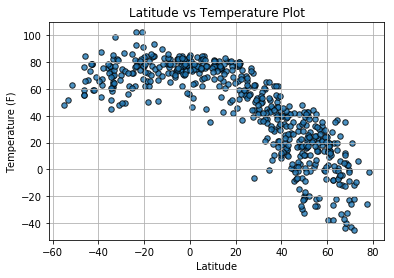

In [151]:
plt.scatter(weather_df["Latitude"], weather_df["Temp"],s=30,edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs Temperature Plot")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("../HW/Temp_vs_Latitude.png")


plt.show()


#### Latitude vs. Humidity Plot

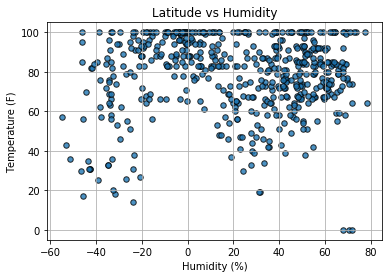

In [152]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"],s=30,edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs Humidity")
plt.ylabel("Temperature (F)")
plt.xlabel("Humidity (%)")
plt.grid(True)


plt.savefig("../HW/Humidity_vs_Latitude.png")


plt.show()

#### Latitude vs. Cloudiness Plot

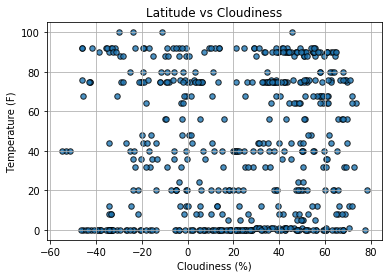

In [153]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"],s=30,edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs Cloudiness")
plt.ylabel("Temperature (F)")
plt.xlabel("Cloudiness (%)")
plt.grid(True)


plt.savefig("../HW/Cloudiness_vs_Latitude.png")


plt.show()

#### Latitude vs. Wind Speed Plot

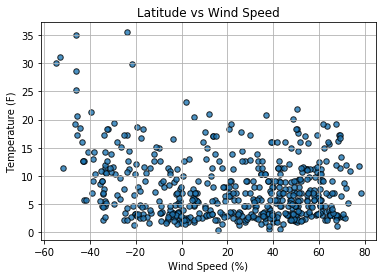

In [154]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"],s=30,edgecolor="black", linewidths=1, marker="o", alpha=0.8)
plt.title("Latitude vs Wind Speed")
plt.ylabel("Temperature (F)")
plt.xlabel("Wind Speed (%)")
plt.grid(True)


plt.savefig("../HW/Wind Speed_vs_Latitude.png")


plt.show()